In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib as mpl
font = {
    
        'weight' : 'bold',
        'size'   : 20}

mpl.rc('font', **font)
import matplotlib.pyplot as plt
import os
import subprocess
import tempfile
import numpy as np
import pandas as pd
import biotite.structure as struc
import biotite.structure.io as strucio
import biotite.structure.io.pdb as PDB
import biotite.structure.io.xtc as XTC
import biotite.structure as bstr
from multiprocessing import Pool
from numpy import trapz

%matplotlib inline

In [2]:
def running_mean(x, N):
    if isinstance(x, pd.core.series.Series):
        x = x.to_numpy()
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# Reading Trajectories

In [3]:
%%time
traj_sb431542 = strucio.load_structure("6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_final_traj.pdb")
traj_sb431542.shape[0]

CPU times: user 7.7 s, sys: 349 ms, total: 8.05 s
Wall time: 8.06 s


501

In [4]:
%%time
#traj_frb_dimer = XTC.XTCFile()
#traj_frb_dimer.read("md_run_frb_frb_dimer/output/kinase_dimer_nopbc_cluster_fit.xtc")
#time = traj_frb_dimer.get_time()
#traj_hetero = traj_hetero.get_coord()
#traj_frb_dimer = traj_frb_dimer.get_structure(frb_dimer)
traj_bacteriochlorin = strucio.load_structure("6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_final_traj.pdb")
traj_bacteriochlorin.shape[0]

CPU times: user 7.68 s, sys: 375 ms, total: 8.06 s
Wall time: 8.07 s


501

In [5]:
time_sb431542 = np.arange(traj_sb431542.shape[0])
time_bacteriochlorlin = np.arange(traj_bacteriochlorin.shape[0])
ind=np.where(time_bacteriochlorlin == time_sb431542[-1])[0][0]
time_capped = time_bacteriochlorlin[:ind]

## RMSD

In [6]:
traj_sb431542, _ = struc.superimpose(traj_sb431542[0], traj_sb431542)
rmsd_sb431542 = struc.rmsd(traj_sb431542[0], traj_sb431542)
traj_bacteriochlorin, _ = struc.superimpose(traj_bacteriochlorin[0], traj_bacteriochlorin)
rmsd_bacteriochlorin = struc.rmsd(traj_bacteriochlorin[0], traj_bacteriochlorin)

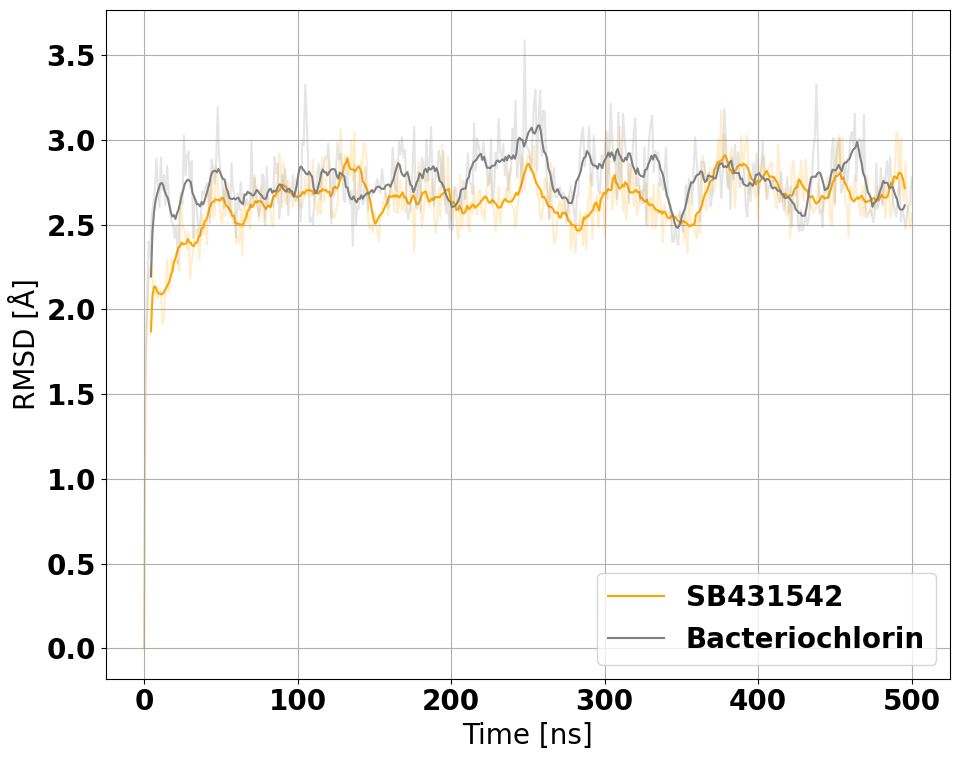

In [7]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


colors=['orange', 'gray']
alpha=0.2
N=10
plt.plot(
    time_sb431542, 
    rmsd_sb431542,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(rmsd_sb431542,N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    time_bacteriochlorlin, 
    rmsd_bacteriochlorin, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(rmsd_bacteriochlorin,N),
    color=colors[1],
    label="Bacteriochlorin"
)
plt.xlabel("Time [ns]")
plt.ylabel("RMSD [Å]")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.savefig("rmsd_overall.png",dpi=800)
#plt.xlim(0, 296)

In [8]:
Rg_sb431542 = struc.gyration_radius(traj_sb431542)
Rg_bacteriochlorin = struc.gyration_radius(traj_bacteriochlorin)

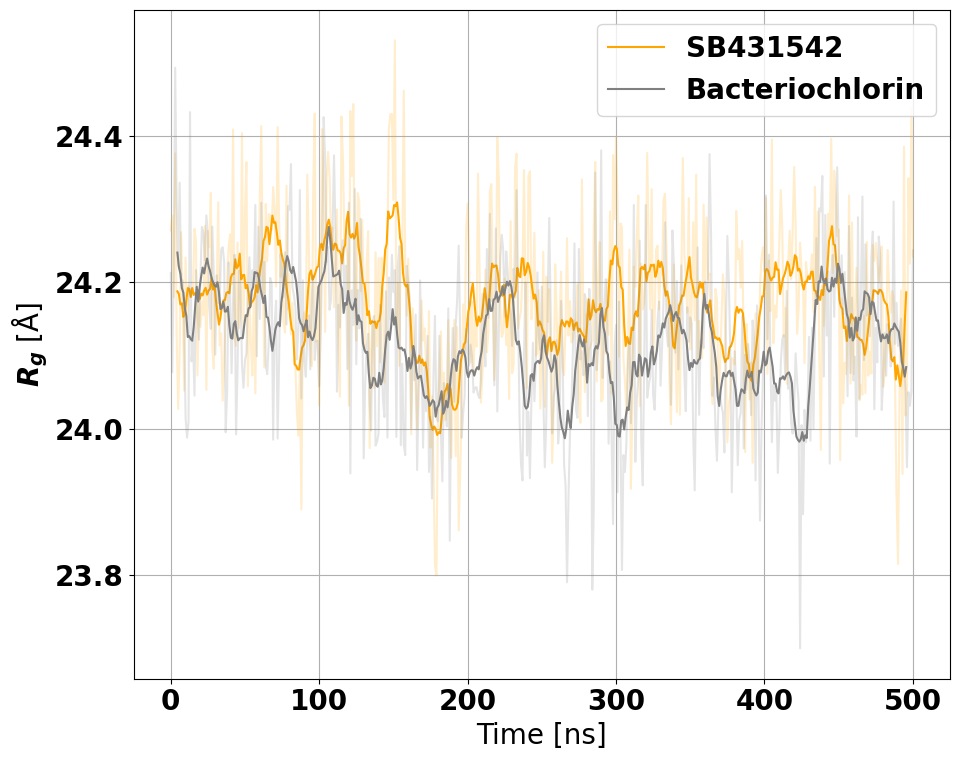

In [9]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

colors=['orange', 'gray']
alpha=0.2
N=10
plt.plot(
    time_sb431542, 
    Rg_sb431542,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(Rg_sb431542,N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    time_bacteriochlorlin, 
    Rg_bacteriochlorin, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(Rg_bacteriochlorin,N),
    color=colors[1],
    label="Bacteriochlorin"
)
plt.xlabel("Time [ns]")
plt.ylabel("$R_g$ [Å]")
plt.legend(loc="best")
plt.grid()
plt.tight_layout()
plt.savefig("Rg_OR3Fa.png",dpi=800)


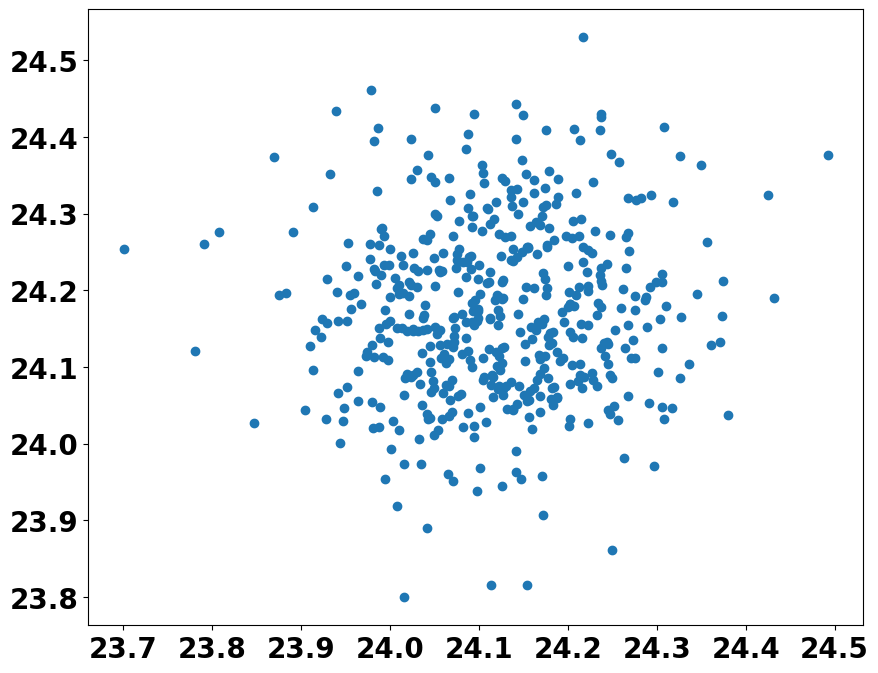

In [10]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.scatter(Rg_bacteriochlorin, Rg_sb431542)
#plt.hist2d(Rg_bacteriochlorin, Rg_sb431542, bins=20)

In [11]:
traj_sb431542_prot_A = traj_sb431542[:, traj_sb431542.chain_id == "A"]
traj_sb431542_prot_A, _ = struc.superimpose(traj_sb431542_prot_A[0], traj_sb431542_prot_A)

traj_sb431542_prot_B = traj_sb431542[:, traj_sb431542.chain_id == "B"]
traj_sb431542_prot_B, _ = struc.superimpose(traj_sb431542_prot_B[0], traj_sb431542_prot_B)

traj_sb431542_prot = traj_sb431542[:, traj_sb431542.chain_id != "C"]
traj_sb431542_prot, _ = struc.superimpose(traj_sb431542_prot[0], traj_sb431542_prot)


rmsd_sb431542_prot_A = struc.rmsd(traj_sb431542_prot_A[0], traj_sb431542_prot_A)
rmsd_sb431542_prot_B = struc.rmsd(traj_sb431542_prot_B[0], traj_sb431542_prot_B)
rmsd_sb431542_prot = struc.rmsd(traj_sb431542_prot[0], traj_sb431542_prot)
Rg_sb431542_prot = struc.gyration_radius(traj_sb431542_prot)

In [12]:
print(rmsd_sb431542_prot_A.shape)
print(rmsd_sb431542_prot_B.shape)
print(rmsd_sb431542_prot.shape)
print(time_sb431542.shape)

(501,)
(501,)
(501,)
(501,)


(0.0, 8.0)

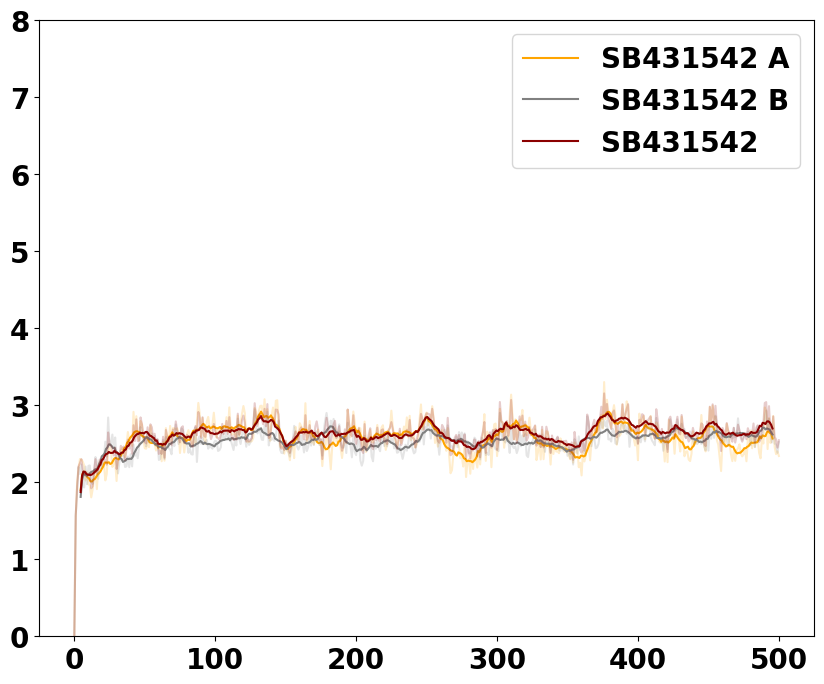

In [13]:
colors=['orange', 'gray','darkred']
alpha=0.2
N=10

plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.plot(
    time_sb431542, 
    rmsd_sb431542_prot_A,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(rmsd_sb431542_prot_A,N),
    color=colors[0],
    label="SB431542 A" 
)

plt.plot(
    time_sb431542, 
    rmsd_sb431542_prot_B, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N),
    running_mean(rmsd_sb431542_prot_B,N),
    color=colors[1],
    label="SB431542 B" 
)
plt.plot(
    time_sb431542, 
    rmsd_sb431542_prot, 
    color=colors[2],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N),
    running_mean(rmsd_sb431542_prot,N),
    color=colors[2],
    label="SB431542" 
)
plt.legend(loc="best")
plt.ylim(0,8)

In [14]:
traj_bacteriochlorin_prot_A = traj_bacteriochlorin[:, traj_bacteriochlorin.chain_id == "A"]
traj_bacteriochlorin_prot_A, _ = struc.superimpose(traj_bacteriochlorin_prot_A[0], traj_bacteriochlorin_prot_A)

traj_bacteriochlorin_prot_B = traj_bacteriochlorin[:, traj_bacteriochlorin.chain_id == "B"]
traj_bacteriochlorin_prot_B, _ = struc.superimpose(traj_bacteriochlorin_prot_B[0], traj_bacteriochlorin_prot_B)

traj_bacteriochlorin_prot = traj_bacteriochlorin[:, traj_bacteriochlorin.chain_id != "C"]
traj_bacteriochlorin_prot, _ = struc.superimpose(traj_bacteriochlorin_prot[0], traj_bacteriochlorin_prot)


rmsd_bacteriochlorin_prot_A = struc.rmsd(traj_bacteriochlorin_prot_A[0], traj_bacteriochlorin_prot_A)
rmsd_bacteriochlorin_prot_B = struc.rmsd(traj_bacteriochlorin_prot_B[0], traj_bacteriochlorin_prot_B)
rmsd_bacteriochlorin_prot = struc.rmsd(traj_bacteriochlorin_prot[0], traj_bacteriochlorin_prot)
Rg_bacteriochlorin_prot = struc.gyration_radius(traj_bacteriochlorin_prot)

In [15]:
print(rmsd_bacteriochlorin_prot_A.shape)
print(rmsd_bacteriochlorin_prot_B.shape)
print(rmsd_bacteriochlorin_prot.shape)
print(time_bacteriochlorlin.shape)

(501,)
(501,)
(501,)
(501,)


(0.0, 8.0)

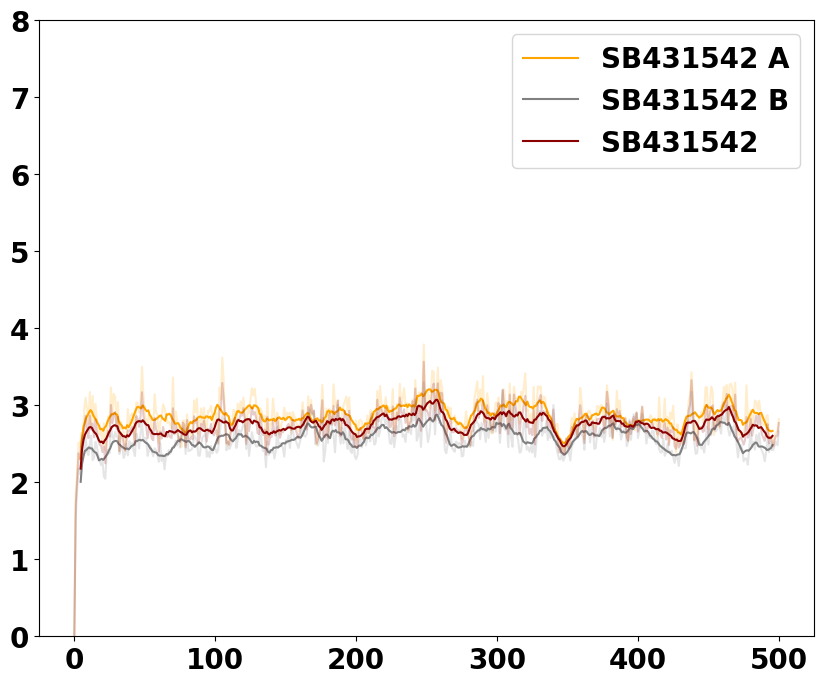

In [16]:
colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.plot(
    time_bacteriochlorlin, 
    rmsd_bacteriochlorin_prot_A,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N), 
    running_mean(rmsd_bacteriochlorin_prot_A,N),
    color=colors[0],
    label="SB431542 A" 
)

plt.plot(
    time_bacteriochlorlin, 
    rmsd_bacteriochlorin_prot_B, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(rmsd_bacteriochlorin_prot_B,N),
    color=colors[1],
    label="SB431542 B" 
)
plt.plot(
    time_bacteriochlorlin, 
    rmsd_bacteriochlorin_prot, 
    color=colors[2],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(rmsd_bacteriochlorin_prot,N),
    color=colors[2],
    label="SB431542" 
)
plt.legend(loc="best")
plt.ylim(0,8)

In [17]:
rmsd_bacteriochlorin_prot_A.shape
rmsd_bacteriochlorin_prot_B.shape
rmsd_bacteriochlorin_prot.shape

(501,)

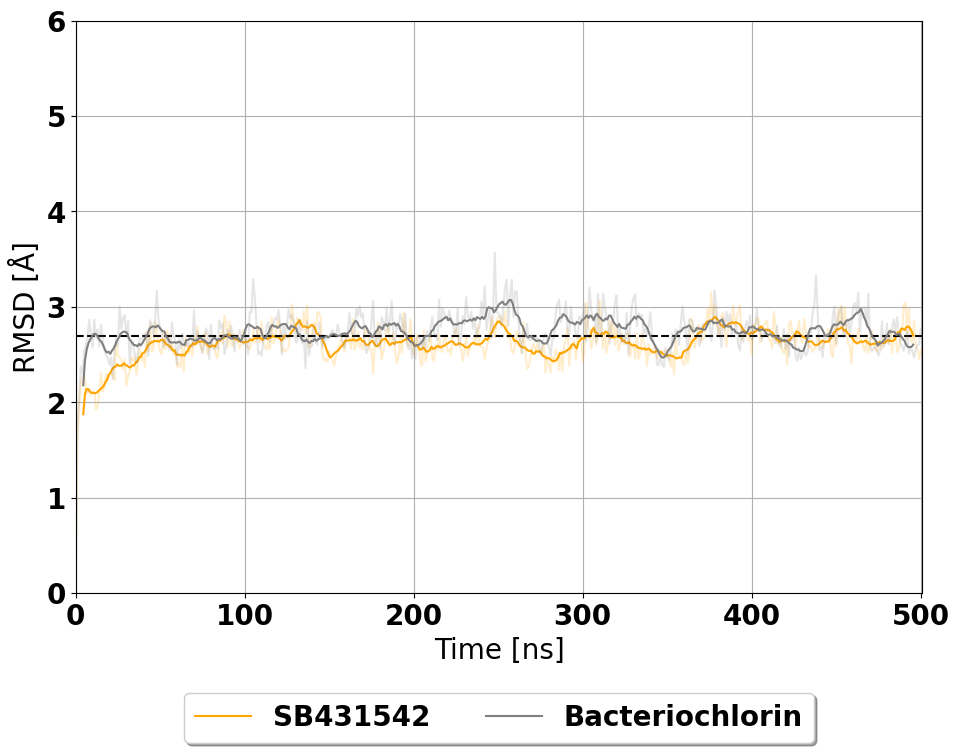

In [18]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.plot(
    time_sb431542, 
    rmsd_sb431542_prot,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(rmsd_sb431542_prot,N),
    color=colors[0],
    label="SB431542" 
)
plt.axhline(np.mean(rmsd_sb431542_prot[-10:]), color="k", ls="--")

plt.plot(
    time_bacteriochlorlin, 
    rmsd_bacteriochlorin_prot, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(rmsd_bacteriochlorin_prot,N),
    color=colors[1],
    label="Bacteriochlorin" 
)
#plt.axhline(np.mean(rmsd_bacteriochlorin_prot[-10:]), color="k", ls="--")
plt.legend(loc="best")
plt.xlabel("Time [ns]")
plt.ylabel("RMSD [Å]")
plt.ylim(0,6)
plt.xlim(0,501)
#plt.legend(loc="best")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.grid()
plt.tight_layout()
plt.savefig("rmsd_overall.png",dpi=800)

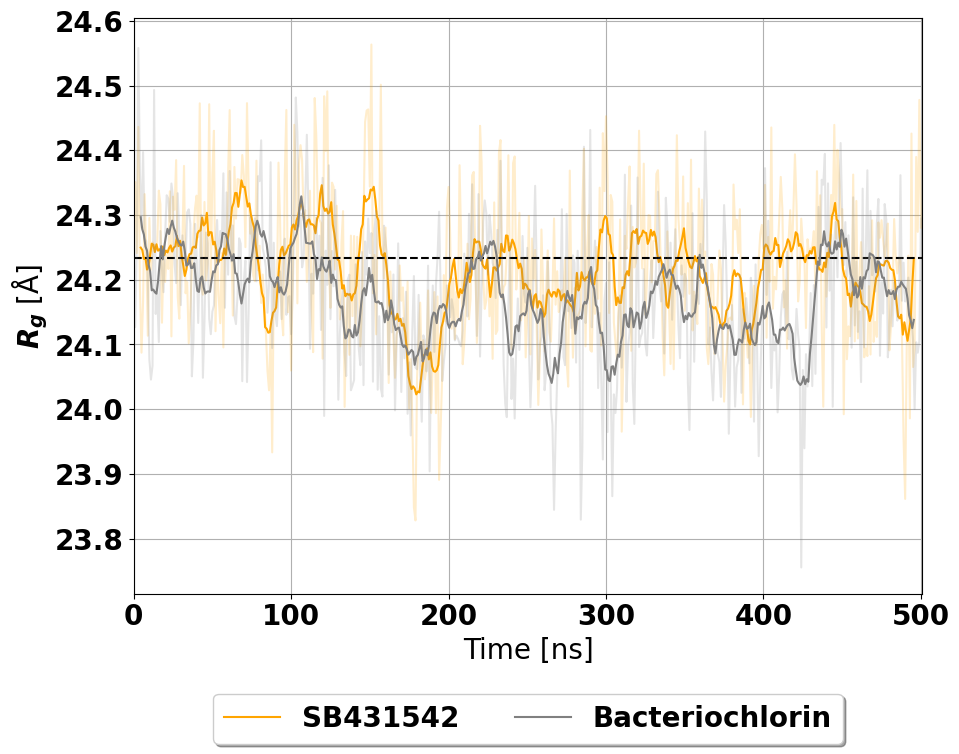

In [19]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.plot(
    time_sb431542, 
    Rg_sb431542_prot,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(Rg_sb431542_prot,N),
    color=colors[0],
    label="SB431542" 
)
plt.axhline(np.mean(Rg_sb431542_prot[-10:]), color="k", ls="--")

plt.plot(
    time_bacteriochlorlin, 
    Rg_bacteriochlorin_prot, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(Rg_bacteriochlorin_prot,N),
    color=colors[1],
    label="Bacteriochlorin" 
)
#plt.axhline(np.mean(rmsd_bacteriochlorin_prot[-10:]), color="k", ls="--")
plt.legend(loc="best")
plt.xlabel("Time [ns]")
plt.ylabel("$R_g$ [Å]")
#plt.ylim(23,26)
#plt.yscale("log")
plt.xlim(0,501)
#plt.legend(loc="best")
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.grid()
plt.tight_layout()
plt.savefig("Rg_overall.png",dpi=800)

In [20]:
traj_sb431542_prot_ca = traj_sb431542_prot[:, traj_sb431542_prot.atom_name == "CA"]
traj_bacteriochlorin_prot_ca = traj_bacteriochlorin_prot[:,traj_bacteriochlorin_prot.atom_name == "CA"]

In [21]:
traj_sb431542_prot_ca_A = traj_sb431542_prot_ca[:, traj_sb431542_prot_ca.chain_id == "A"]
traj_sb431542_prot_ca_B = traj_sb431542_prot_ca[:, traj_sb431542_prot_ca.chain_id == "B"]
traj_bacteriochlorin_prot_ca_A = traj_bacteriochlorin_prot_ca[:, traj_bacteriochlorin_prot_ca.chain_id == "A"]
traj_bacteriochlorin_prot_ca_B = traj_bacteriochlorin_prot_ca[:, traj_bacteriochlorin_prot_ca.chain_id == "B"]

res_count_A = struc.get_residue_count(traj_sb431542_prot_ca_A)
res_count_B = struc.get_residue_count(traj_sb431542_prot_ca_B)

rmsf_sb431542_prot_ca_A = struc.rmsf(struc.average(traj_sb431542_prot_ca_A), traj_sb431542_prot_ca_A)
rmsf_sb431542_prot_ca_B = struc.rmsf(struc.average(traj_sb431542_prot_ca_B), traj_sb431542_prot_ca_B)
rmsf_bacteriochlorin_prot_ca_A = struc.rmsf(struc.average(traj_bacteriochlorin_prot_ca_A), traj_bacteriochlorin_prot_ca_A)
rmsf_bacteriochlorin_prot_ca_B = struc.rmsf(struc.average(traj_bacteriochlorin_prot_ca_B), traj_bacteriochlorin_prot_ca_B)

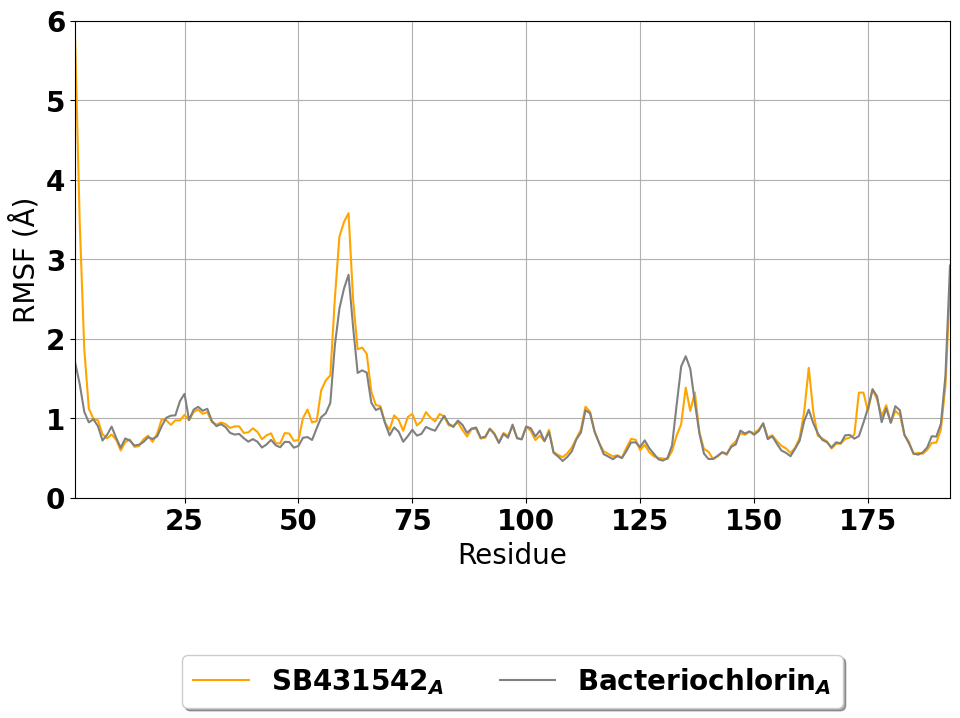

In [22]:
# In all models, mask the CA atoms
#ca_trajectory = trajectory[:, trajectory.atom_name == "CA"]
#rmsf = struc.rmsf(struc.average(ca_trajectory), ca_trajectory)


colors=['orange', 'gray','darkred']
alpha=1
N=10


figure = plt.figure(figsize=(10,8))
ax = figure.add_subplot(111)
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

ax.plot(
    np.arange(1, res_count_A + 1), 
    rmsf_sb431542_prot_ca_A, 
    color=colors[0],
    alpha=alpha,
    label="SB431542$_A$" 
    
)
ax.plot(
    np.arange(1, res_count_A + 1), 
    rmsf_bacteriochlorin_prot_ca_A, 
    color=colors[1],
    alpha=alpha,
    label="Bacteriochlorin$_A$" 
)

ax.set_xlim(1, res_count_A)
ax.set_ylim(0, 6)
ax.set_xlabel("Residue")
ax.set_ylabel("RMSF (Å)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5)
plt.grid()
figure.tight_layout()
plt.savefig("rmsf_overall_prot_A.png", dpi=800)

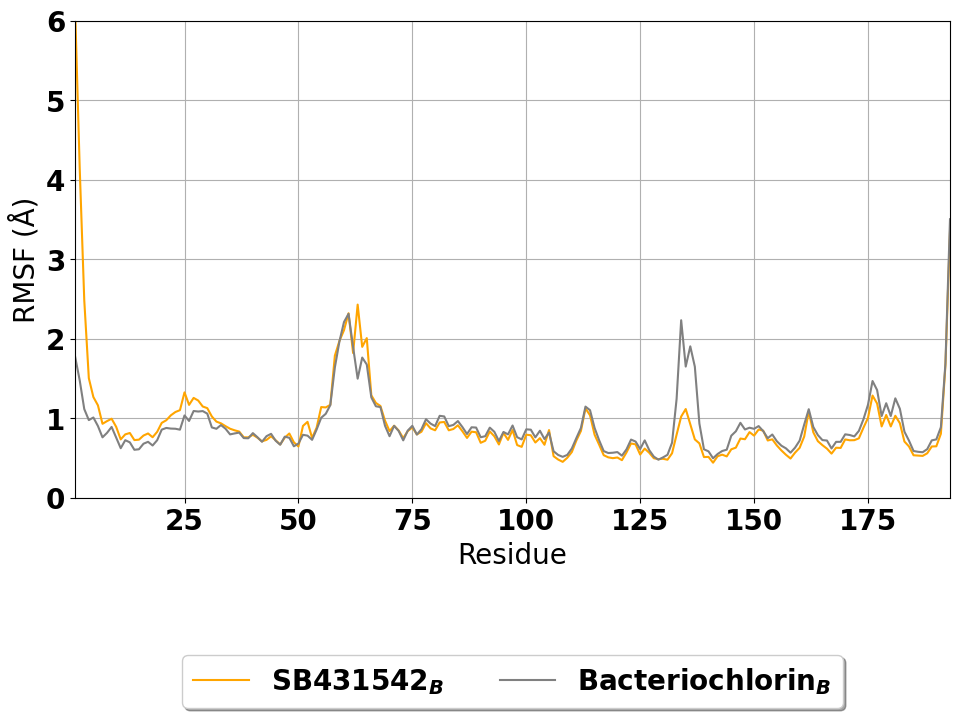

In [23]:
colors=['orange', 'gray','darkred']
alpha=1
N=10

figure = plt.figure(figsize=(10,8))
ax = figure.add_subplot(111)
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

ax.plot(
    np.arange(1, res_count_A + 1), 
    rmsf_sb431542_prot_ca_B, 
    color=colors[0],
    alpha=alpha,
    label="SB431542$_{B}$"     
)
ax.plot(
    np.arange(1, res_count_A + 1), 
    rmsf_bacteriochlorin_prot_ca_B, 
    color=colors[1],
    alpha=alpha,
    label="Bacteriochlorin$_{B}$"     
)

ax.set_xlim(1, res_count_A)
ax.set_ylim(0, 6)
ax.set_xlabel("Residue")
ax.set_ylabel("RMSF (Å)")
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.savefig("rmsf_overall_prot_B.png", dpi=800)

In [24]:
from biotite.structure import CellList

D_CUTOFF=4

def count_contacts(chain_a, chain_b, d_cut):

    cell_list_a = CellList(chain_a, cell_size=d_cut)
    
    contacts = cell_list_a.get_atoms(chain_b.coord, radius=d_cut)
    count = np.where((contacts != -1).any(axis=1))[0].shape[0]
    return count
    
def f_worker_AC_sb431542(ind):

    chain_a = traj_sb431542[ind, traj_sb431542.chain_id == "A"]
    chain_b = traj_sb431542[ind, traj_sb431542.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)

def f_worker_BC_sb431542(ind):

    chain_a = traj_sb431542[ind, traj_sb431542.chain_id == "B"]
    chain_b = traj_sb431542[ind, traj_sb431542.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)


def f_worker_AC_bacteriochlorin(ind):

    chain_a = traj_bacteriochlorin[ind, traj_bacteriochlorin.chain_id == "A"]
    chain_b = traj_bacteriochlorin[ind, traj_bacteriochlorin.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)

def f_worker_BC_bacteriochlorin(ind):

    chain_a = traj_bacteriochlorin[ind, traj_bacteriochlorin.chain_id == "B"]
    chain_b = traj_bacteriochlorin[ind, traj_bacteriochlorin.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)

In [25]:
inds = np.arange(traj_sb431542.shape[0])
with Pool() as p:
    contacts_sb451542_AC = p.map(f_worker_AC_sb431542, inds)
    contacts_sb451542_BC = p.map(f_worker_BC_sb431542, inds)

inds = np.arange(traj_bacteriochlorin.shape[0])
with Pool() as p:
    contacts_bacteriochlorin_AC = p.map(f_worker_AC_bacteriochlorin, inds)
    contacts_bacteriochlorin_BC = p.map(f_worker_BC_bacteriochlorin, inds)

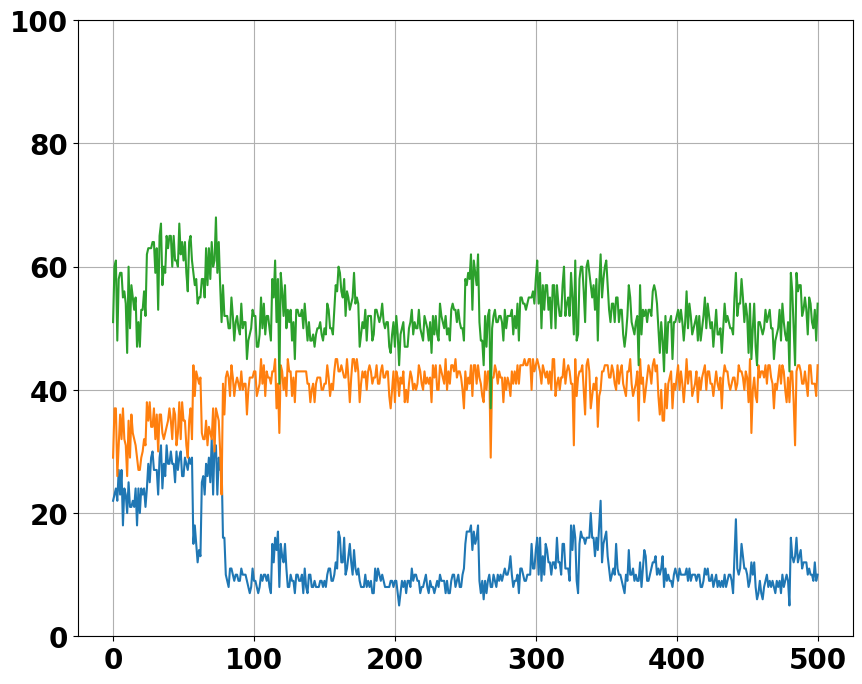

In [26]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.plot(contacts_sb451542_AC)
plt.plot(contacts_sb451542_BC)
plt.plot(np.array(contacts_sb451542_AC)+np.array(contacts_sb451542_BC))
plt.ylim(0, 100)
plt.grid()

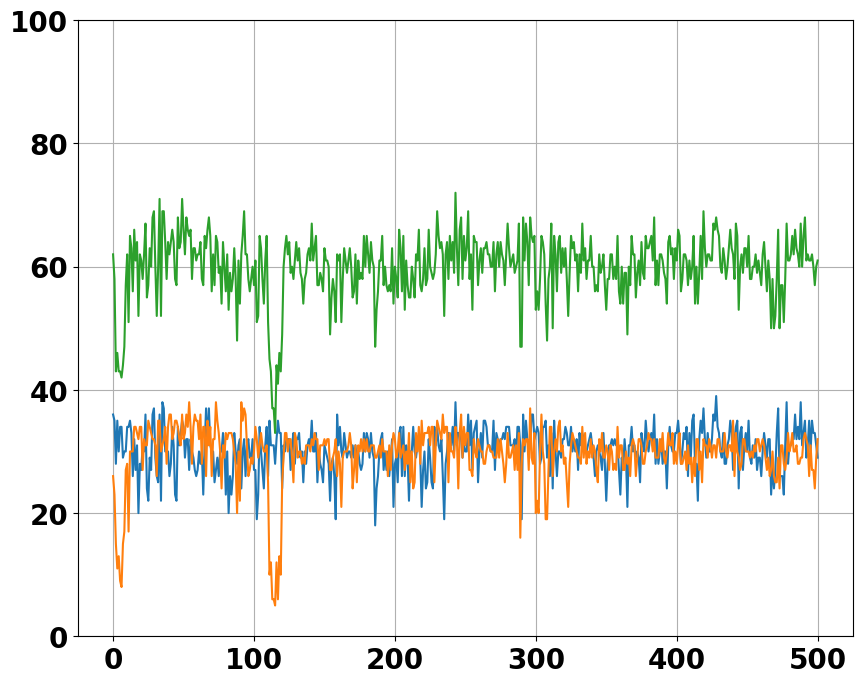

In [27]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.plot(contacts_bacteriochlorin_AC)
plt.plot(contacts_bacteriochlorin_BC)
plt.plot(np.array(contacts_bacteriochlorin_AC)+np.array(contacts_bacteriochlorin_BC))
plt.ylim(0, 100)
plt.grid()

In [28]:
from biotite.structure import CellList

D_CUTOFF=4

def count_contacts(chain_a, chain_b, d_cut):

    cell_list_a = CellList(chain_a, cell_size=d_cut)
    
    contacts = cell_list_a.get_atoms(chain_b.coord, radius=d_cut)
    count = np.where((contacts != -1).any(axis=1))[0].shape[0]
    return count

def f_worker_AC_perResi_bacteriochlorin(x):
    i_resi, ind = x
    chain_a = traj_bacteriochlorin[ind, (traj_bacteriochlorin.chain_id == "A") & (traj_bacteriochlorin.res_id == i_resi)]
    chain_b = traj_bacteriochlorin[ind, traj_bacteriochlorin.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)

def f_worker_BC_perResi_bacteriochlorin(x):
    i_resi, ind = x
    chain_a = traj_bacteriochlorin[ind, (traj_bacteriochlorin.chain_id == "B") & (traj_bacteriochlorin.res_id == i_resi)]
    chain_b = traj_bacteriochlorin[ind, traj_bacteriochlorin.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)


In [29]:
%%time
resis_A = traj_bacteriochlorin_prot_A[0, traj_bacteriochlorin_prot_A.atom_name == "CA"].res_id
#print(resis_A)
inds_bacteriochlorin = np.arange(traj_bacteriochlorin.shape[0])
contacts_per_resi_bacteriochlorin_AC = []
print("calculating contacts between bacteriochlorin and chain A residues")
for resi in resis_A:
    print("{0}/{1}".format(resi, resis_A[-1]), end='\r')
    ind_resi_tuple = [ [resi, ind] for ind in inds_bacteriochlorin]
    with Pool(64) as p:
        contacts=p.map(f_worker_AC_perResi_bacteriochlorin, ind_resi_tuple)        
    contacts_per_resi_bacteriochlorin_AC.append(contacts)

contacts_per_resi_bacteriochlorin_AC = np.array(contacts_per_resi_bacteriochlorin_AC)

calculating contacts between bacteriochlorin and chain A residues
CPU times: user 4.81 s, sys: 34.7 s, total: 39.5 s
Wall time: 48.5 s


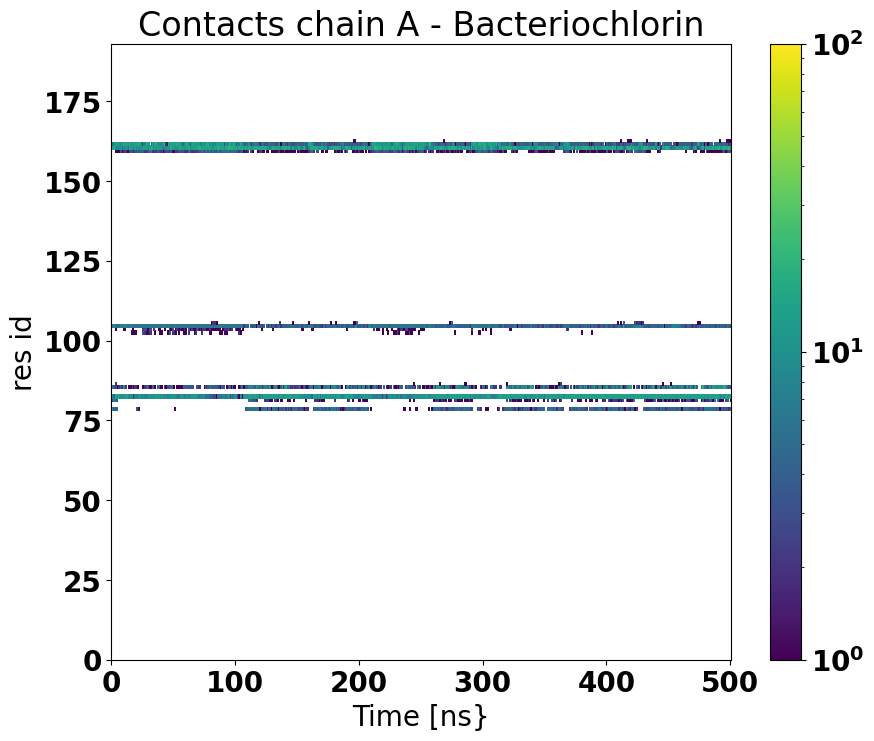

In [30]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.title("Contacts chain A - Bacteriochlorin")
plt.pcolor(contacts_per_resi_bacteriochlorin_AC, norm=mpl.colors.LogNorm(vmax=10**2))
plt.ylabel("res id")
plt.xlabel("Time [ns}")
plt.colorbar()

In [31]:
resis_B = traj_bacteriochlorin_prot_B[0, traj_bacteriochlorin_prot_B.atom_name == "CA"].res_id
#print(resis_A)
inds_bacteriochlorin = np.arange(traj_bacteriochlorin.shape[0])
contacts_per_resi_bacteriochlorin_BC = []
print("calculating contacts between bacteriochlorin and chain B residues")

for resi in resis_B:
    print("{0}/{1}".format(resi, resis_B[-1]), end='\r')
    ind_resi_tuple = [ [resi, ind] for ind in inds_bacteriochlorin]
    with Pool(64) as p:
        contacts=p.map(f_worker_BC_perResi_bacteriochlorin, ind_resi_tuple)        
    contacts_per_resi_bacteriochlorin_BC.append(contacts)
contacts_per_resi_bacteriochlorin_BC = np.array(contacts_per_resi_bacteriochlorin_BC)

calculating contacts between bacteriochlorin and chain B residues


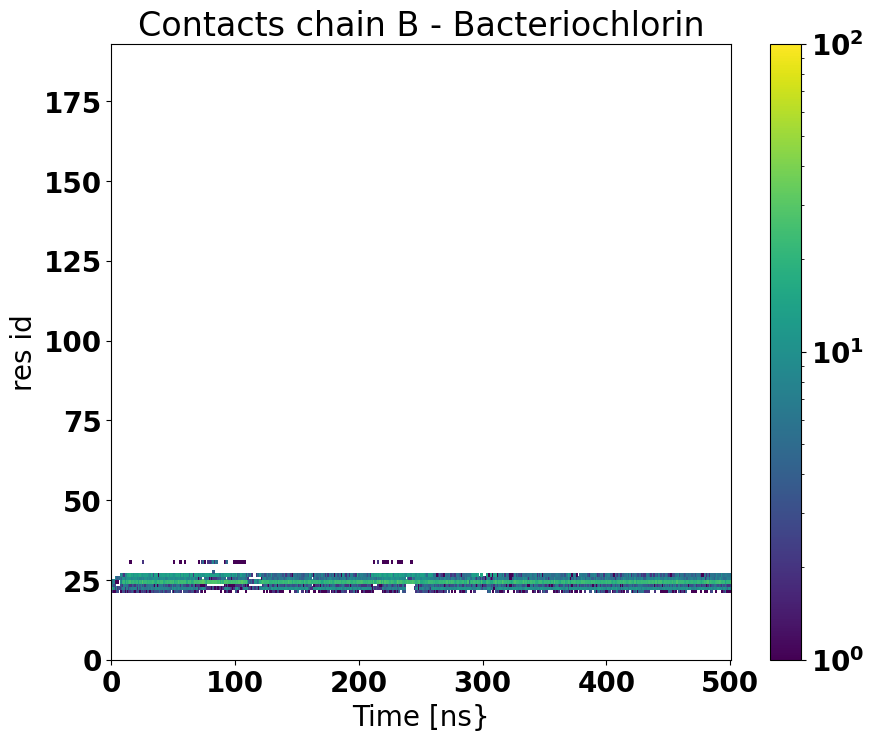

In [32]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.title("Contacts chain B - Bacteriochlorin")
plt.pcolor(contacts_per_resi_bacteriochlorin_BC, norm=mpl.colors.LogNorm(vmax=10**2))
plt.ylabel("res id")
plt.xlabel("Time [ns}")
plt.colorbar()

In [33]:
def f_worker_AC_perResi_sb431542(x):
    i_resi, ind = x
    chain_a = traj_sb431542[ind, (traj_sb431542.chain_id == "A") & (traj_sb431542.res_id == i_resi)]
    chain_b = traj_sb431542[ind, traj_sb431542.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)

def f_worker_BC_perResi_sb431542(x):
    i_resi, ind = x
    chain_a = traj_sb431542[ind, (traj_sb431542.chain_id == "B") & (traj_sb431542.res_id == i_resi)]
    chain_b = traj_sb431542[ind, traj_sb431542.chain_id == "C"]
    
    return count_contacts(chain_a, chain_b, D_CUTOFF)

In [34]:
resis_A = traj_sb431542_prot_A[0,traj_sb431542_prot_B.atom_name == "CA"].res_id
#print(resis_A)
inds_sb431542 = np.arange(traj_sb431542.shape[0])
contacts_per_resi_sb431542_AC = []
print("calculating contacts between bacteriochlorin and chain A residues")

for resi in resis_A:
    print("{0}/{1}".format(resi, resis_B[-1]), end='\r')
    ind_resi_tuple = [ [resi, ind] for ind in inds_sb431542]
    with Pool(64) as p:
        contacts=p.map(f_worker_AC_perResi_sb431542, ind_resi_tuple)        
    contacts_per_resi_sb431542_AC.append(contacts)
contacts_per_resi_sb431542_AC = np.array(contacts_per_resi_sb431542_AC)

calculating contacts between bacteriochlorin and chain A residues


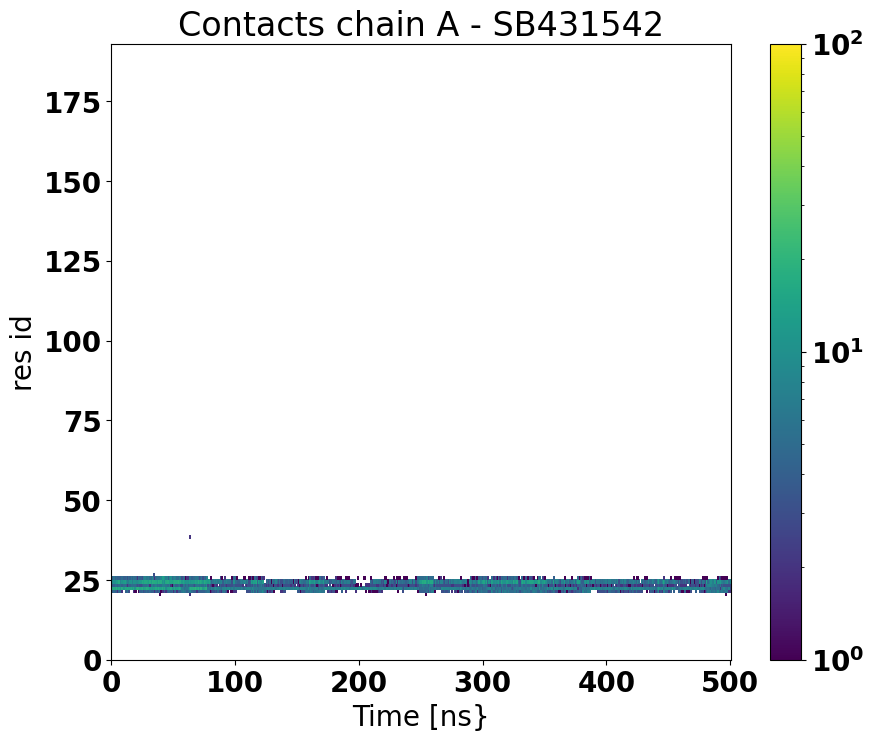

In [35]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.title("Contacts chain A - SB431542")
plt.pcolor(contacts_per_resi_sb431542_AC, norm=mpl.colors.LogNorm(vmax=10**2))
plt.ylabel("res id")
plt.xlabel("Time [ns}")
plt.colorbar()

In [36]:
resis_B = traj_sb431542_prot_B[0,traj_sb431542_prot_B.atom_name == "CA"].res_id
#print(resis_A)
inds_sb431542 = np.arange(traj_sb431542.shape[0])
contacts_per_resi_sb431542_BC = []
print("calculating contacts between bacteriochlorin and chain B residues")

for resi in resis_B:
    print("{0}/{1}".format(resi, resis_B[-1]), end='\r')
    ind_resi_tuple = [ [resi, ind] for ind in inds_sb431542]
    with Pool(64) as p:
        contacts=p.map(f_worker_BC_perResi_sb431542, ind_resi_tuple)        
    contacts_per_resi_sb431542_BC.append(contacts)
contacts_per_resi_sb431542_BC = np.array(contacts_per_resi_sb431542_BC)

calculating contacts between bacteriochlorin and chain B residues


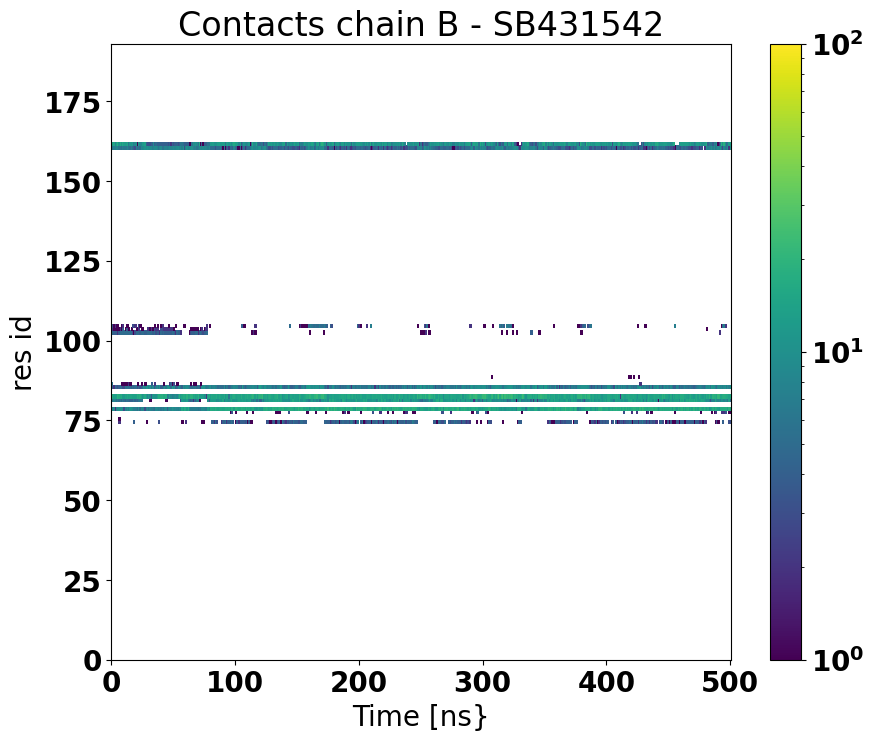

In [37]:

plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.title("Contacts chain B - SB431542")
plt.pcolor(contacts_per_resi_sb431542_BC, norm=mpl.colors.LogNorm(vmax=10**2))
plt.ylabel("res id")
plt.xlabel("Time [ns}")
plt.colorbar()

## Joint contact analysis

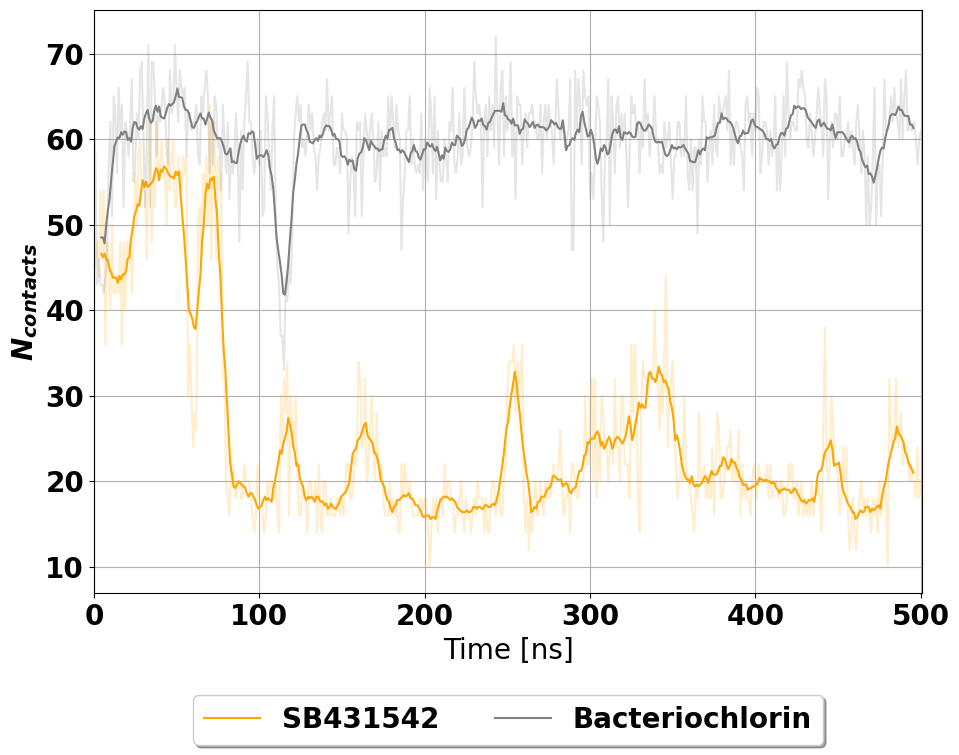

In [38]:
contacts_sb451542_AC=np.array(contacts_sb451542_AC)
contacts_sb451542_BC=np.array(contacts_sb451542_BC)
contacts_bacteriochlorin_AC=np.array(contacts_bacteriochlorin_AC)
contacts_bacteriochlorin_BC=np.array(contacts_bacteriochlorin_BC)

contacts_bacteriochlorin = contacts_bacteriochlorin_AC+contacts_bacteriochlorin_BC
contacts_sb431542 = contacts_sb451542_AC+contacts_sb451542_AC

colors=['orange', 'gray']
alpha=0.2
N=10

plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.plot(
    time_sb431542, 
    contacts_sb431542,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(contacts_sb431542,N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    time_bacteriochlorlin, 
    contacts_bacteriochlorin,
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N), 
    running_mean(contacts_bacteriochlorin,N),
    color=colors[1],
    label="Bacteriochlorin" 
)
plt.xlabel("Time [ns]")
plt.ylabel("$N_{contacts}$")
#plt.legend(loc="best")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
#plt.ylim(0, 100)
plt.xlim(0,501)
plt.grid()
plt.tight_layout()
plt.savefig("contactsAbs_over_time.png",dpi=800)

In [39]:
ind_max_bact = np.argmax(contacts_bacteriochlorin)
print(" maximum number of contacts between Bacteriochlorin and OR3Fa :: {0} at t={1} ns".format(
    contacts_bacteriochlorin[ind_max_bact], time_bacteriochlorlin[ind_max_bact]
    )
)
ind_max_sb = np.argmax(contacts_sb431542)
print(" maximum number of contacts between SB431542 and OR3Fa :: {0} at t={1} ns".format(
    contacts_sb431542[ind_max_sb], time_sb431542[ind_max_sb]
    )
)

 maximum number of contacts between Bacteriochlorin and OR3Fa :: 72 at t=243 ns
 maximum number of contacts between SB431542 and OR3Fa :: 64 at t=70 ns


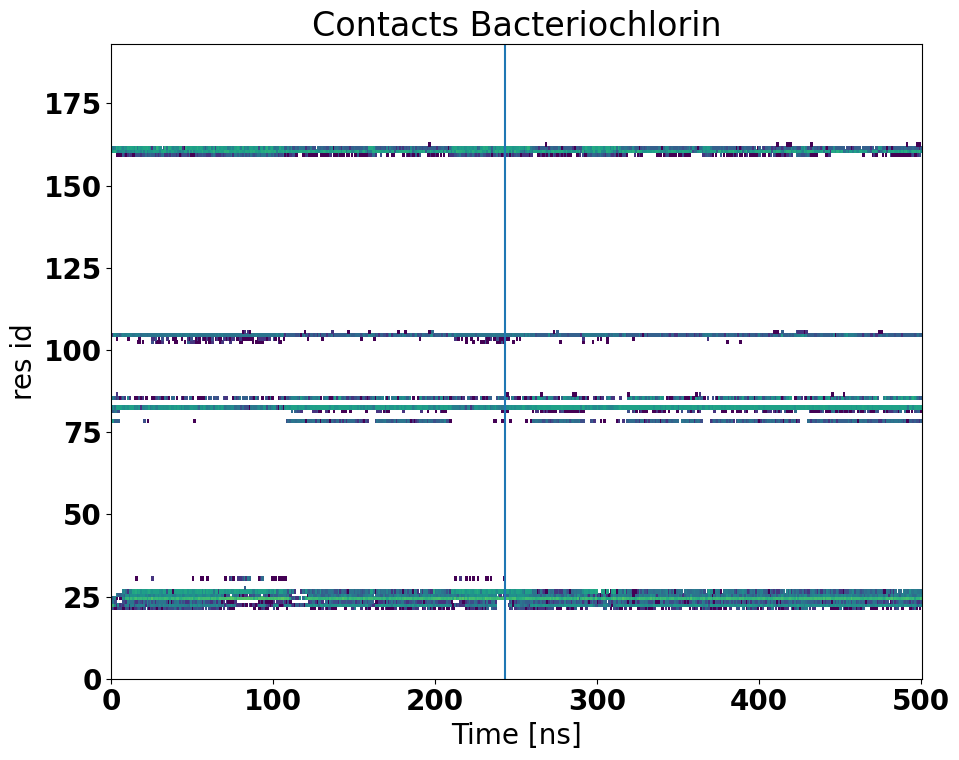

In [40]:

plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.title("Contacts Bacteriochlorin")
plt.pcolor(contacts_per_resi_bacteriochlorin_AC+contacts_per_resi_bacteriochlorin_BC, norm=mpl.colors.LogNorm(vmax=10**2))
plt.ylabel("res id")
plt.xlabel("Time [ns]")
plt.axvline(time_bacteriochlorlin[ind_max_bact])
plt.tight_layout()
plt.savefig("contacts_bacteriochlorin.png",dpi=800)

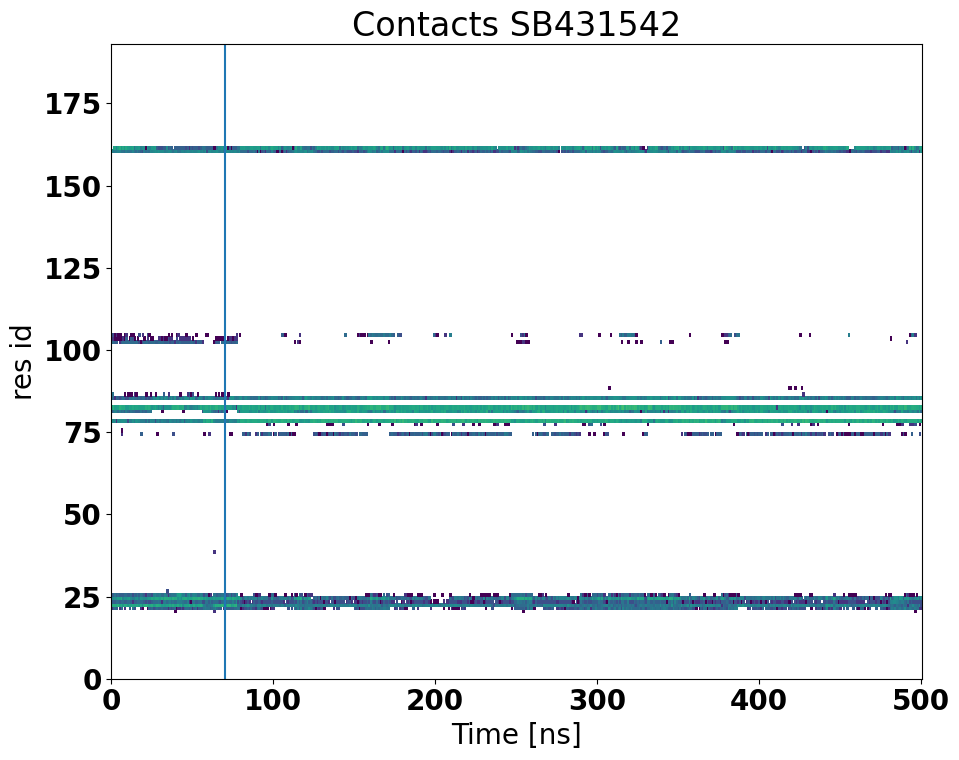

In [41]:

plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')


plt.title("Contacts SB431542")
plt.pcolor(contacts_per_resi_sb431542_AC+contacts_per_resi_sb431542_BC, norm=mpl.colors.LogNorm(vmax=10**2))
plt.ylabel("res id")
plt.xlabel("Time [ns]")
plt.axvline(time_sb431542[ind_max_sb])
plt.tight_layout()
plt.savefig("contacts_SB431542.png",dpi=800)

In [42]:
strucio.save_structure("sb431542_max_contacts.pdb", traj_sb431542[ind_max_sb])

pose_bact_maxcon = traj_bacteriochlorin[ind_max_sb]
filter_chainA = pose_bact_maxcon.chain_id == "A"
filter_chainB = pose_bact_maxcon.chain_id == "B"
pose_bact_maxcon[filter_chainA].chain_id = np.repeat("B", filter_chainA[filter_chainA].shape[0])
pose_bact_maxcon[filter_chainB].chain_id = np.repeat("A", filter_chainA[filter_chainB].shape[0])
strucio.save_structure("bacteriochlorin_max_contacts.pdb", pose_bact_maxcon)

In [43]:
os.system("ls output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA | grep .xvg")

#6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullf.xvg.1#
#6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullx.xvg.1#
#conf0_umbrella_pullf.xvg.1#
#conf0_umbrella_pullx.xvg.1#
#conf676_umbrella_pullf.xvg.1#
#conf676_umbrella_pullx.xvg.1#
#histo.xvg.1#
#histo.xvg.2#
#histo.xvg.3#
#profile.xvg.1#
#profile.xvg.2#
6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullf.xvg
6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullx.xvg
conf0_umbrella_pullf.xvg
conf0_umbrella_pullx.xvg
conf100_umbrella_pullf.xvg
conf100_umbrella_pullx.xvg
conf108_umbrella_pullf.xvg
conf108_umbrella_pullx.xvg
conf115_umbrella_pullf.xvg
conf115_umbrella_pullx.xvg
conf119_umbrella_pullf.xvg
conf119_umbrella_pullx.xvg
conf132_umbrella_pullf.xvg
conf132_umbrella_pullx.xvg
conf145_umbrella_pullf.xvg
conf145_umbrella_pullx.xvg
conf158_umbrella_pullf.xvg
conf158_umbrella_pullx.xvg
conf171_umbrella_pullf.xvg
conf171_umbrella_pullx.xvg


0

In [44]:
os.system("ls output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA | grep .xvg")

#histo.xvg.1#
#histo.xvg.2#
#histo.xvg.3#
#histo.xvg.4#
#histo.xvg.5#
#profile.xvg.1#
#profile.xvg.2#
#profile.xvg.3#
6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_pullf.xvg
6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_pullx.xvg
conf0_umbrella_pullf.xvg
conf0_umbrella_pullx.xvg
conf106_umbrella_pullf.xvg
conf106_umbrella_pullx.xvg
conf107_umbrella_pullf.xvg
conf107_umbrella_pullx.xvg
conf129_umbrella_pullf.xvg
conf129_umbrella_pullx.xvg
conf145_umbrella_pullf.xvg
conf145_umbrella_pullx.xvg
conf150_umbrella_pullf.xvg
conf150_umbrella_pullx.xvg
conf158_umbrella_pullf.xvg
conf158_umbrella_pullx.xvg
conf174_umbrella_pullf.xvg
conf174_umbrella_pullx.xvg
conf197_umbrella_pullf.xvg
conf197_umbrella_pullx.xvg
conf204_umbrella_pullf.xvg
conf204_umbrella_pullx.xvg
conf214_umbrella_pullf.xvg
conf214_umbrella_pullx.xvg
conf232_umbrella_pullf.xvg
conf232_umbrella_pullx.xvg
conf263_umbrella_pullf.xvg
conf263_umbrella_pullx.xvg
conf287_umbrella_pullf

0

In [45]:
pullx_sb431542 = None
pullf_sb431542 = None
folder = "output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA/"
pathx = folder + "6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullx.xvg"
with open(pathx) as f_pullx:
    pullx_sb431542=f_pullx.readlines()
pathf = folder + "6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA_npt_pulling_pullf.xvg"
with open(pathf) as f_pullf:
    pullf_sb431542=f_pullf.readlines()

In [46]:
pullx_bacteriochlorin = None
pullf_bacteriochlorin = None
folder = "output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA/"
pathx = folder + "6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_pullx.xvg"
with open(pathx) as f_pullx:
    pullx_bacteriochlorin=f_pullx.readlines()
pathf = folder + "6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA_npt_pulling_pullf.xvg"
with open(pathf) as f_pullf:
    pullf_bacteriochlorin=f_pullf.readlines()

In [47]:
timef_bact=np.array([float(x.strip().split()[0]) for x in pullf_bacteriochlorin[17:]])
pullf_bact=np.array([float(x.strip().split()[-1]) for x in pullf_bacteriochlorin[17:]])
pullx_bact=np.array([float(x.strip().split()[-1]) for x in pullx_bacteriochlorin[17:]])
pullx_sb = np.array([float(x.strip().split()[-1]) for x in pullx_sb431542[17:]])
pullf_sb = np.array([float(x.strip().split()[-1]) for x in pullf_sb431542[17:]])
timef_sb= np.array([float(x.strip().split()[0]) for x in pullf_sb431542[17:]])

ind_min_bact = np.min([pullf_bact.shape[0], pullx_bact.shape[0]])
ind_min_sb = np.min([pullf_sb.shape[0], pullx_sb.shape[0]])
print(ind_min_bact)
print(ind_min_sb)

6329
6325


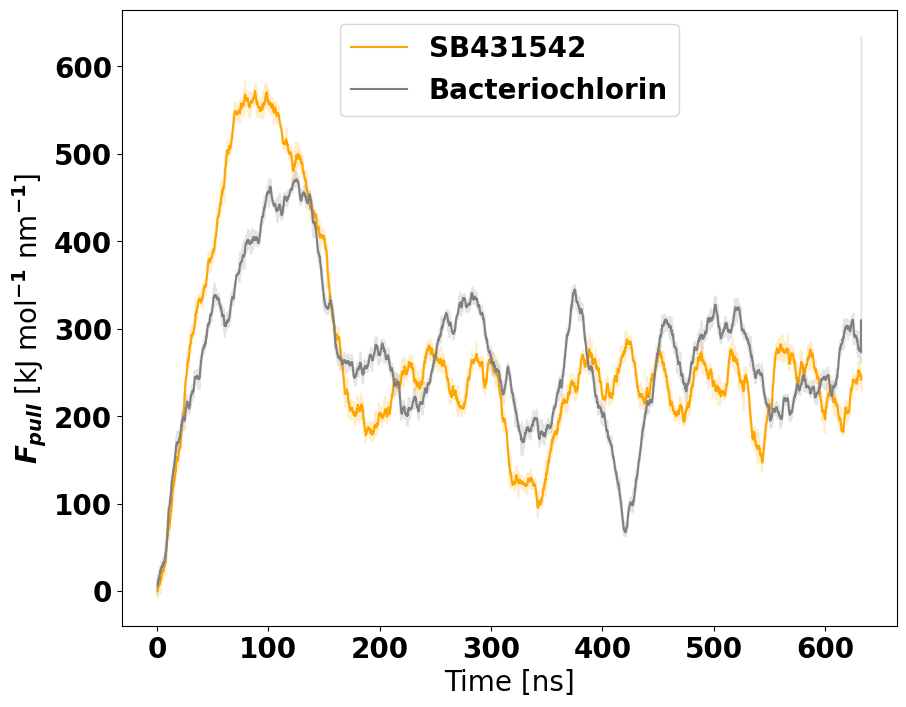

In [48]:
#plt.plot(pullx_bact, pullf_bact, label="Bacteriochlorin")
#plt.plot(pullx_sb, pullf_sb, label="SB431542")
colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.plot(
    timef_sb, 
    pullf_sb,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(timef_sb,N), 
    running_mean(pullf_sb,N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    timef_bact, 
    pullf_bact,
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(timef_bact,N), 
    running_mean(pullf_bact,N),
    color=colors[1],
    label="Bacteriochlorin" 
)

plt.xlabel("Time [ns]")
plt.ylabel("$F_{pull}$ [kJ mol$^{-1}$ nm$^{-1}$]")
plt.legend(loc="best")

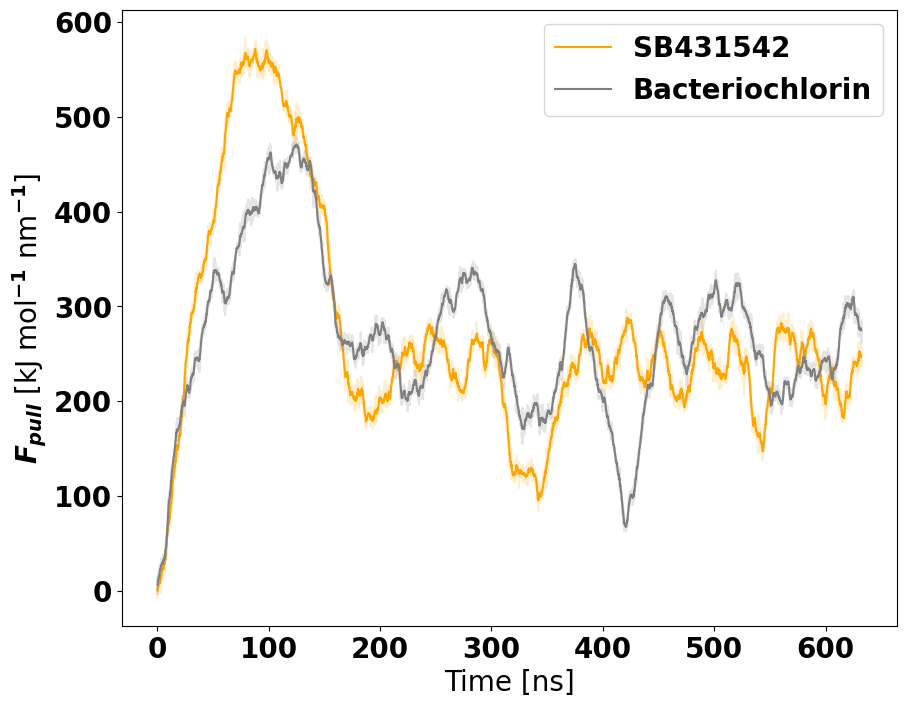

In [49]:
#plt.plot(pullx_bact, pullf_bact, label="Bacteriochlorin")
#plt.plot(pullx_sb, pullf_sb, label="SB431542")
colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.plot(
    timef_sb[:ind_min_sb], 
    pullf_sb[:ind_min_sb],
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(timef_sb[:ind_min_sb],N), 
    running_mean(pullf_sb[:ind_min_sb],N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    timef_bact[:ind_min_sb], 
    pullf_bact[:ind_min_sb],
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(timef_bact[:ind_min_sb],N), 
    running_mean(pullf_bact[:ind_min_sb],N),
    color=colors[1],
    label="Bacteriochlorin" 
)

plt.xlabel("Time [ns]")
plt.ylabel("$F_{pull}$ [kJ mol$^{-1}$ nm$^{-1}$]")
plt.legend(loc="best")

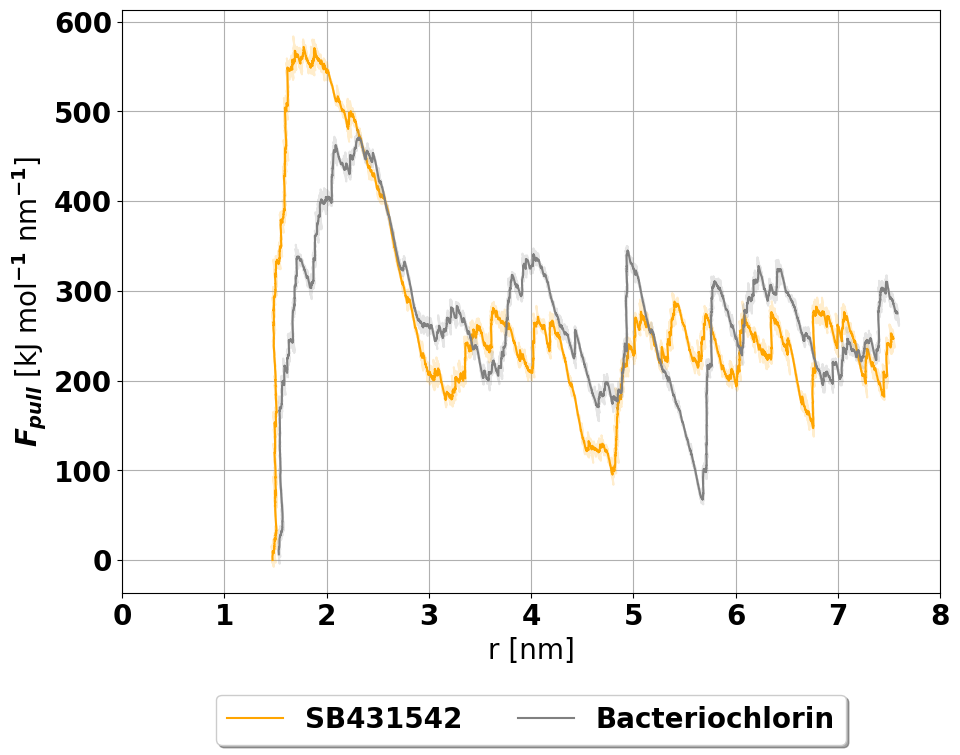

In [50]:
#plt.plot(pullx_bact, pullf_bact, label="Bacteriochlorin")
#plt.plot(pullx_sb, pullf_sb, label="SB431542")
colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.plot(
    pullx_sb[:ind_min_sb],
    pullf_sb[:ind_min_sb],
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(pullx_sb[:ind_min_sb] ,N), 
    running_mean(pullf_sb[:ind_min_sb] ,N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    pullx_bact[:ind_min_sb], 
    pullf_bact[:ind_min_sb],
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(pullx_bact[:ind_min_sb],N), 
    running_mean(pullf_bact[:ind_min_sb],N),
    color=colors[1],
    label="Bacteriochlorin" 
)

plt.xlabel("r [nm]")
plt.xlim(0,8)
plt.ylabel("$F_{pull}$ [kJ mol$^{-1}$ nm$^{-1}$]")
plt.grid()
#plt.legend(loc="best")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.savefig("pulling_force_over_dist.png",dpi=800)

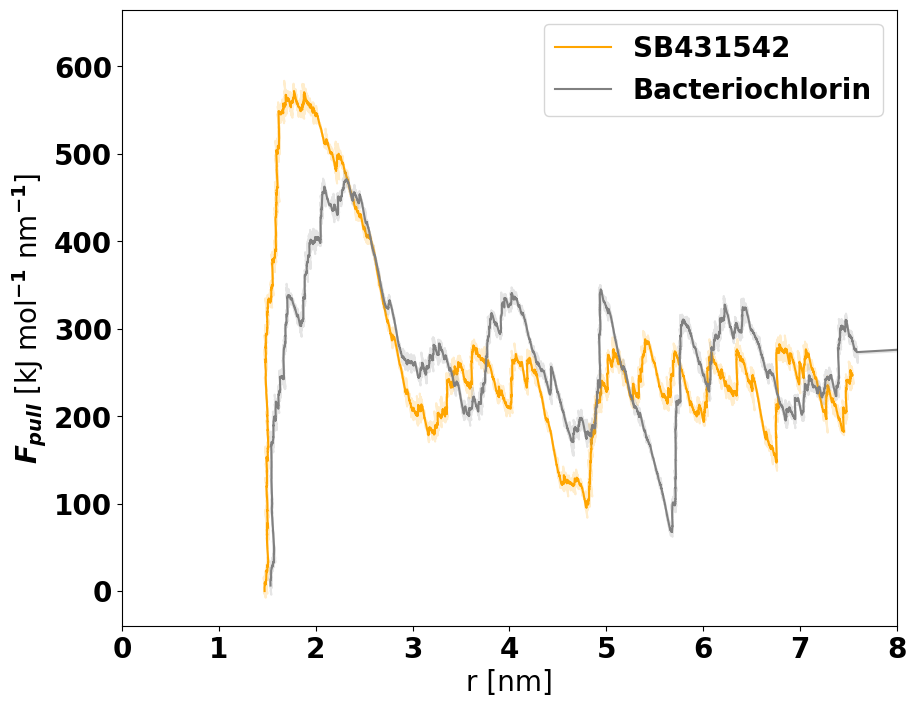

In [51]:
#plt.plot(pullx_bact, pullf_bact, label="Bacteriochlorin")
#plt.plot(pullx_sb, pullf_sb, label="SB431542")
colors=['orange', 'gray','darkred']
alpha=0.2
N=10
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.plot(
    pullx_sb[:ind_min_sb],
    pullf_sb[:ind_min_sb],
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(pullx_sb[:ind_min_sb] ,N), 
    running_mean(pullf_sb[:ind_min_sb] ,N),
    color=colors[0],
    label="SB431542" 
)

plt.plot(
    pullx_bact[:ind_min_bact], 
    pullf_bact[:ind_min_bact],
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(pullx_bact[:ind_min_bact],N), 
    running_mean(pullf_bact[:ind_min_bact],N),
    color=colors[1],
    label="Bacteriochlorin" 
)

plt.xlabel("r [nm]")
plt.xlim(0,8)
plt.ylabel("$F_{pull}$ [kJ mol$^{-1}$ nm$^{-1}$]")
plt.legend(loc="best")

In [52]:
time_sb431542_red = time_sb431542[:ind_min_sb]
f_sb431542_red = pullf_sb[:ind_min_sb]

dx = np.mean(time_sb431542_red[1:] - time_sb431542_red[:-1])
W_pull_sb431542 = trapz(f_sb431542_red, dx=dx)
W_pull_sb431542

1710353.234332412

In [53]:
time_bact_red = time_bacteriochlorlin[:ind_min_bact]
f_bact_red = pullf_bact[:ind_min_bact]

dx = np.mean(time_bact_red[1:] - time_bact_red[:-1])
W_pull_sb431542 = trapz(f_bact_red, dx=dx)
W_pull_sb431542

1700982.9771090993

In [54]:
print(contacts_sb431542[:ind_min_sb].shape)
print(time_sb431542[:ind_min_sb].shape)
print(time_sb431542.shape)

(501,)
(501,)
(501,)


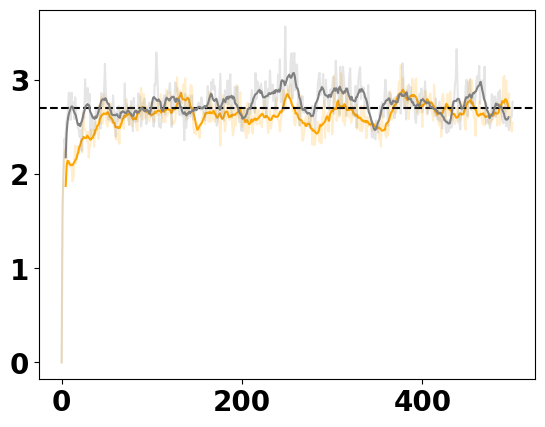

In [57]:
plt.plot(
    time_sb431542, 
    rmsd_sb431542_prot,
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(time_sb431542,N), 
    running_mean(rmsd_sb431542_prot,N),
    color=colors[0],
    label="SB431542" 
)
plt.axhline(np.mean(rmsd_sb431542_prot[-10:]), color="k", ls="--")

plt.plot(
    time_bacteriochlorlin, 
    rmsd_bacteriochlorin_prot, 
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(time_bacteriochlorlin,N),
    running_mean(rmsd_bacteriochlorin_prot,N),
    color=colors[1],
    label="bacteriochlorin" 
)

# MMGBSA

In [58]:
df_mmgbsa_sb = pd.read_csv("output_6xdc_SB431542_edit.pdb_ligand_sb431542_edit.sdf_ESPALOMA/FINAL_RESULTS_MMPBSA.csv", skiprows=3014)
df_mmgbsa_bact = pd.read_csv("output_6xdc_bacteriochlorin_prot.pdb_bacteriochlorin.sdf_ESPALOMA/FINAL_RESULTS_MMPBSA.sv", skiprows=3014)

In [59]:
df_mmgbsa_sb.keys()

Index(['Frame #', 'BOND', 'ANGLE', 'DIHED', 'VDWAALS', 'EEL', '1-4 VDW',
       '1-4 EEL', 'EGB', 'ESURF', 'GGAS', 'GSOLV', 'TOTAL'],
      dtype='object')

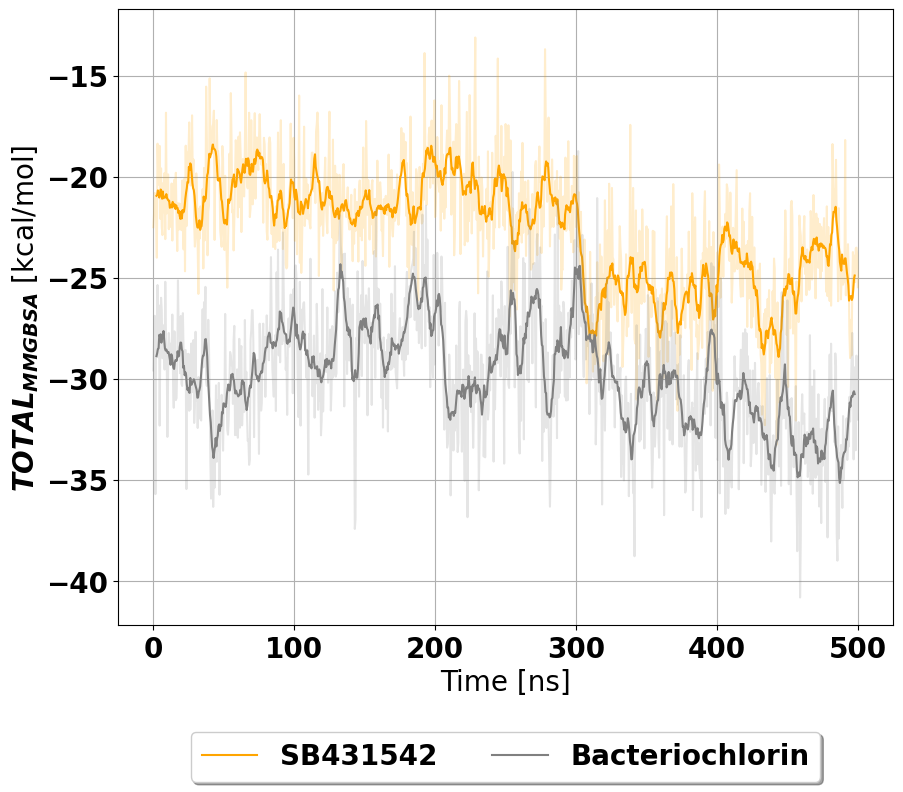

In [60]:
plt.figure(figsize=(10,8))
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

t = np.linspace(0, 500, len(df_mmgbsa_sb["TOTAL"]))

plt.plot(
    t,
    df_mmgbsa_sb["TOTAL"],
    color=colors[0],
    alpha=alpha
)
plt.plot(
    running_mean(t,N), 
    running_mean(df_mmgbsa_sb["TOTAL"],N),
    color=colors[0],
    label="SB431542" 
)
plt.plot(
    t, 
    df_mmgbsa_bact["TOTAL"],
    color=colors[1],
    alpha=alpha
)
plt.plot(
    running_mean(t,N),
    running_mean(df_mmgbsa_bact["TOTAL"],N),
    color=colors[1],
    label="Bacteriochlorin" 
)
plt.xlabel("Time [ns]")
plt.grid()
plt.ylabel("$TOTAL_{MMGBSA}$ [kcal/mol]")
#plt.legend(loc="best")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.savefig("mmgbsa_interaction_energy.png", dpi=800)

In [61]:
!pip install seaborn

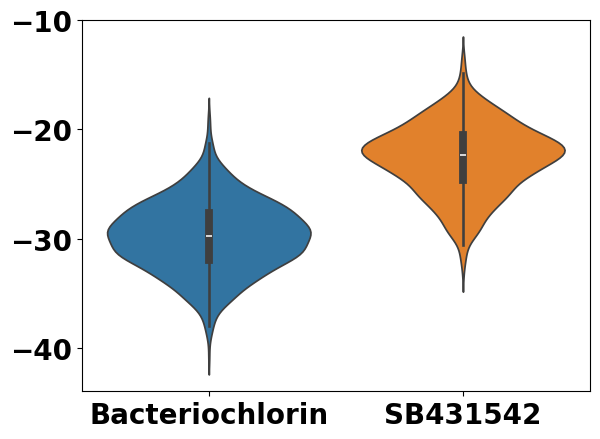

In [62]:
import seaborn as sns
df_totals = pd.DataFrame(
    {
        "Bacteriochlorin":df_mmgbsa_bact["TOTAL"],
        "SB431542":df_mmgbsa_sb["TOTAL"],
    }
)
sns.violinplot(df_totals)
plt.tight_layout()
plt.savefig("interaction_mmgbs_violin.png", dpi=800)

# Excel export for Assim

In [63]:
df_traj = pd.DataFrame({
    'time': time_sb431542,
    "RMSD_ORF3a_with_SB431542": rmsd_sb431542_prot,
    "Rg_ORF3a_with_SB431542": Rg_sb431542_prot,
    "number_of_contacts_ORF3a_with_SB431542": contacts_sb431542,    
    "RMSD_ORF3a_with_bacteriochlorin": rmsd_bacteriochlorin_prot,
    "Rg_ORF3a_with_bacteriochlorin": Rg_bacteriochlorin_prot,
    "number_of_contacts_ORF3a_with_bacteriochlorin": contacts_bacteriochlorin,
})

df_traj_run_avg = pd.DataFrame({
    'time': running_mean(time_sb431542,N),
    "RMSD_ORF3a_with_SB431542":running_mean( rmsd_sb431542_prot,N),
    "Rg_ORF3a_with_SB431542": running_mean(Rg_sb431542_prot,N),
    "number_of_contacts_ORF3a_with_SB431542": running_mean(contacts_sb431542,N),    
    "RMSD_ORF3a_with_bacteriochlorin": running_mean(rmsd_bacteriochlorin_prot,N),
    "Rg_ORF3a_with_bacteriochlorin": running_mean(Rg_bacteriochlorin_prot,N),
    "number_of_contacts_ORF3a_with_bacteriochlorin": running_mean(contacts_bacteriochlorin,N),
}) 

df_pull = pd.DataFrame({
    'time':timef_sb[:ind_min_sb], 
    'pulling_distance_SB431542': pullx_sb[:ind_min_sb],
    'pulling_force_SB431542': pullf_sb[:ind_min_sb],
    'pulling_distance_bacteriochlorin': pullx_bact[:ind_min_sb],
    'pulling_force_bacteriochlorin': pullf_bact[:ind_min_sb],    
})


In [64]:
!pip install openpyxl
with pd.ExcelWriter('md_results_orf3a_with_loop_mistak.xlsx') as writer:
    df_traj.to_excel(writer, sheet_name='MD results 500 ns')
    df_traj_run_avg.to_excel(writer, sheet_name='MD results 500 ns running mean')    
    df_pull.to_excel(writer, sheet_name='Non-eq pulling MD')

In [83]:
df_figure_modeling = pd.DataFrame({
    'time': time_sb431542,
    "RMSD_ORF3a_with_SB431542": rmsd_sb431542_prot,
    "Rg_ORF3a_with_SB431542": Rg_sb431542_prot,
    "number_of_contacts_ORF3a_with_SB431542": contacts_sb431542,    
    "RMSD_ORF3a_with_bacteriochlorin": rmsd_bacteriochlorin_prot,
    "Rg_ORF3a_with_bacteriochlorin": Rg_bacteriochlorin_prot,
    "number_of_contacts_ORF3a_with_bacteriochlorin": contacts_bacteriochlorin,
})

df_RMSF  = pd.DataFrame({
    'Residue ID': np.arange(1, res_count_A + 1), 
    'rmsf_A_SB431542 [Å]': rmsf_sb431542_prot_ca_A,
    'rmsf_B_SB431542 [Å]': rmsf_sb431542_prot_ca_B,    
    'rmsf_A_Bacteriochlorin [Å]': rmsf_bacteriochlorin_prot_ca_A,
    'rmsf_B_Bacteriochlorin [Å]': rmsf_bacteriochlorin_prot_ca_B,        
})

df_figure_supplement = pd.DataFrame({
    'time': time_sb431542,
    "RMSD_ORF3a_with_SB431542": rmsd_sb431542_prot,
    "Rg_ORF3a_with_SB431542": Rg_sb431542_prot,
    "number_of_contacts_ORF3a_with_SB431542": contacts_sb431542,    
    "RMSD_ORF3a_with_bacteriochlorin": rmsd_bacteriochlorin_prot,
    "Rg_ORF3a_with_bacteriochlorin": Rg_bacteriochlorin_prot,
    "number_of_contacts_ORF3a_with_bacteriochlorin": contacts_bacteriochlorin,
})



df_fig_rmsd = pd.DataFrame(
    {
        'time': time_sb431542,
        "RMSD_ORF3a_with_SB431542 [Å]": rmsd_sb431542_prot,
        "RMSD_ORF3a_with_bacteriochlorin [Å]": rmsd_bacteriochlorin_prot,
    }
)

df_fig_Rg = pd.DataFrame(
    {
        'time': time_sb431542,
        "Number of contacts between SB431542 and ORF3a dimer [Å]": contacts_sb431542,
        "Number of contacts between bacteriochlorin and ORF3a dimer [Å]": contacts_bacteriochlorin,
    }    
)

df_fig_RMSF= pd.DataFrame(
    {
        'time': time_sb431542,
        "Number of contacts between SB431542 and ORF3a dimer [Å]": contacts_sb431542,
        "Number of contacts between bacteriochlorin and ORF3a dimer [Å]": contacts_bacteriochlorin,
    }    
)

df_fig_pull  = pd.DataFrame(
    {
        "Δr [nm] SB431542": pullx_sb[:ind_min_sb],
        "ΔF kJ/(mol*nm)] SB431542": pullf_sb[:ind_min_sb],
        "Δr [nm] bacteriochlorin": pullx_bact[:ind_min_sb],
        "ΔF kJ/(mol*nm)] bacteriochlorin": pullx_bact[:ind_min_sb],        
    }    
)

df_fig_noc = pd.DataFrame(
    {
        'time': time_sb431542,
        "Number of contacts between SB431542 and ORF3a dimer": contacts_sb431542,
        "Number of contacts between bacteriochlorin and ORF3a dimer": contacts_bacteriochlorin,
    }    
)

df_fig_mmgbsa = pd.DataFrame(
    {
        'time': t,
        "MM-GBSA Interaction Energy ORF3a - SB431542 [kcal/mol]": df_mmgbsa_sb["TOTAL"],
        "MM-GBSA Interaction Energy ORF3a - bacteriochlorin [kcal/mol": df_mmgbsa_bact["TOTAL"],
    }    
)
 

In [94]:
contacts_bact = contacts_per_resi_bacteriochlorin_AC+contacts_per_resi_bacteriochlorin_BC
#contacts_bact = contacts_bact.transpose()
contacts_sb = contacts_per_resi_sb431542_AC+contacts_per_resi_sb431542_BC
#contacts_sb = contacts_sb.transpose()

In [105]:
dict_contacts_bact = {}
for i in range(1,contacts_bact.shape[0]):
    dict_contacts_bact[str(i)] = contacts_bact[i-1]

df_contact_bact_profile = pd.DataFrame(dict_contacts_bact)
#df_contact_bact_profile
df_contact_bact_profile[[str(i) for i in range(75,100)]]

,75,76,77,78,79,80,81,82,83,84,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,13,0,0,4,8,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,11,0,0,4,10,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,4,0,0,6,6,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,4,0,0,3,14,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,4,0,0,3,14,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,3,0,0,3,15,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,3,0,0,4,14,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,2,0,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
dict_contacts_sb = {}
for i in range(1,contacts_sb.shape[0]):
    dict_contacts_sb[str(i)] = contacts_sb[i-1]

df_contact_sb_profile = pd.DataFrame(dict_contacts_sb)
#df_contact_sb_profile
df_contact_sb_profile[[str(i) for i in range(75,100)]]

,75,76,77,78,79,80,81,82,83,84,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,11,0,0,4,16,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,8,0,0,6,19,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,9,0,0,8,13,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,7,13,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,9,0,0,5,14,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,3,17,0,0,10,17,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,18,0,0,9,16,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,14,0,0,6,16,0,...,0,0,0,0,0,0,0,0,0,0
499,3,0,0,1,19,0,0,14,14,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
!pip install openpyxl
with pd.ExcelWriter('modeling_results.xlsx') as writer:
    df_fig_rmsd.to_excel(writer, sheet_name='RMSD')
    df_fig_Rg.to_excel(writer, sheet_name='Rg')
    df_RMSF.to_excel(writer, sheet_name="RMSF")
    df_fig_noc.to_excel(writer, sheet_name='Number of contacts (#num)')
    df_fig_pull.to_excel(writer, sheet_name='Pulling force')
    df_fig_mmgbsa.to_excel(writer, sheet_name='MM-GBSA')
    df_contact_sb_profile.to_excel(writer, sheet_name='Contact profile SB431542')
    df_contact_bact_profile.to_excel(writer, sheet_name='Contact profile Bacteriochlorin')
    
    